<a href="https://colab.research.google.com/github/RohanC07/Machine_Learning/blob/main/Machine_Learning_in_Chemistry_Assessment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://seeklogo.com/images/U/university-of-york-logo-3047BD6538-seeklogo.com.png" alt="drawing" height="100"/> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

# **Machine Learning in Chemistry: from atoms to atmospheres**
# *Assessment 1: analysing protein backbone conformation with the Ramachandran plot.*
*This assessment has a coding component and a report component; both parts have to be completed in this notebook, completing the provided code cells (`#TODO`) and discussing your results in a text cell.*
<br><br>


###Introduction

The **Ramachandran plot** is a graphical representation of the allowed and disallowed dihedral angles (ϕ,ψ, or `phi` and `psi`) of amino acids in a protein structure. It helps assess sterically favourable backbone conformations. Outliers, where amino acids adopt unusual conformations, can indicate errors in structure determination or functionally important strained regions. The plot is a crucial validation tool in crystallography, Cryo-EM, protein fold prediction and molecular simulations.

The **Top8000 dataset**, developed by the Richardson lab (http://kinemage.biochem.duke.edu/research/top8000/), is a curated set of 8,000 high-quality protein structures, providing a reliable reference for backbone conformations. In this assessment, you will build your own high quality reference dataset, and use it to analyse the backbone conformations of two test proteins, 1AFQ (1.8 Å resolution) and 1CGI (2.3 Å resolution). **Make sure these two structures are not part of your reference dataset.** Code is provided for downloading structures, and for calculating the Ramachandran dihedral angles (ϕ,ψ) to help you in your analysis.

In the lectures and workshops so far you have learned how to build a dataset of PDB structures using the PDB's advanced search (https://www.rcsb.org/search/advanced). You also know some model and experimental data quality metrics you could use for filtering your searches and analysing the test models further (e.g. B-factor analysis, planarity of the omega bond...). With this in mind, complete the code and text cells to meet the following objectives:

1.   Build a **high quality reference dataset** composed of **no more than 500 protein structures**. Use resolution as a basic filtering criterion, but investigate what other additional metrics you could use – most metrics we have seen in the lectures are available in the Advanced Search.
2.   Calculate `phi` and `psi` for your reference dataset, plot data on 2D histograms like the plots presented in the lectures. A histogram will allow you to see what bins are less populated than the rest – torsion pairs in these binds may be classified as outliers. An example is provided below. Should all amino acids go in the same plot? Revisit the lectures and decide.
3.   Plot and compare the Ramachandran angles for the two test structures against the reference dataset separately. Bear in mind that, while the structures contain the same protein, they have different numbers of chains/polymers – **make sure you analyse them all**. Look at the structures in Moorhen (https://moorhen.org/) to get an idea of what data you are working with – you can 'Fetch map data' for both structures if you want to look at the electron density.
3.   Discuss your results (**400 words max**). How many structures did you include in your reference set? What filtering criteria did you use and why? Do your histograms look like other published versions of the Ramachandran plot? Is one test structure better than the other one, and if it is, does the better one have all Ramachandran angles in regions covered by your high quality reference dataset? Explain any further analysis done on the test structures (e.g. B-factor analysis, planarity of the omega bond...).

Here is an example of the kind of 2D histograms you will have to generate. Remember to use different markers if overlaying a test structure onto this plot:

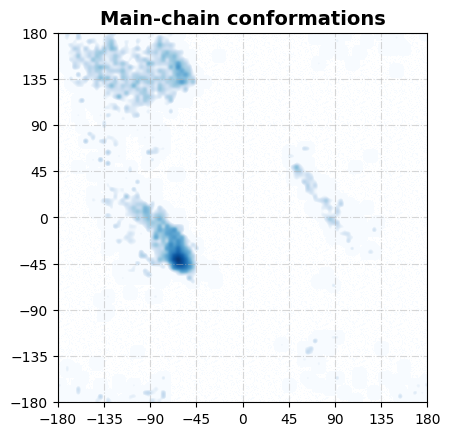

###Code

The following code will install the required packages and create the folders for the reference and test datasets. Feel free to install other things if you think they would be useful.

In [ ]:
!pip install gemmi wget
!mkdir -p reference_dataset
!mkdir -p test_structures

This code will import the required modules into the runtime. Again, feel free to import other things you might need, such as `matplotlib`.

In [ ]:
import wget
import gemmi
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from math import degrees, isnan
import numpy as np

This code will download the test dataset, composed of two structures of the same protein.
**Please run it, but don't modify anything.**

In [ ]:
pdb_codes = "1AFQ,1CGI"
pdb_list = pdb_codes.split(',')

for pdb in tqdm(pdb_list) :
  wget.download("https://files.rcsb.org/download/" + pdb + ".cif", "test_structures")

Paste your PDB selection into the `pdb_codes` empty string.

In [ ]:
pdb_codes = "1EJG,1ET1,1ETL,1ETM,1ETN,1FN8,1FY4,1FY5,1G66,1GDN,1GDQ,1GWE,1I1W,1IEE,1IQZ,1IX9,1IXB,1J0P,1JXW,1JXX,1KTH,1L9L,1LUG,1M40,1MJ5,1MUW,1MXT,1N1P,1N4U,1N4W,1N55,1N9B,1NWZ,1P9G,1PQ5,1PQ7,1PWM,1R6J,1RTQ,1S5N,1SSX,1UCS,1V6P,1VB0,1VBW,1W0N,1X8P,1X8Q,1XVO,1YK4,1YWA,1Z8A,1ZZK,2B97,2BW4,2DDX,2DSX,2FLA,2FMA,2FVY,2GLK,2GUD,2HS1,2I16,2I17,2IXT,2O7A,2OL9,2OV0,2P74,2PEV,2PF8,2PFH,2PWA,2QDV,2QDW,2QXW,2V8B,2VHK,2VHR,2VU6,2XJP,2XOM,2Y78,2YKZ,2YL0,2YL7,2ZQ7,2ZQA,3A2O,3A38,3A39,3BCJ,3DHA,3EA6,3FIL,3FX5,3G21,3G46,3G9X,3GYJ,3HGP,3IP0,3KLR,3KS3,3M5Q,3MFJ,3MI4,3NED,3NIR,3O4P,3QL9,3QM5,3QM6,3QM9,3QPA,3QR7,3RY2,3S6E,3U7T,3UI4,3UI6,3VLA,3VN3,3VOR,3W5H,3WDN,3WGE,3WGX,3WVM,3X2L,3X2M,3X32,3X33,3X34,3X35,3ZOJ,3ZR8,4A8I,4AR6,4AYO,4AYP,4BVM,4CE8,4D5M,4E3Y,4EA9,4EGU,4EIC,4F19,4F1V,4G13,4G78,4G9S,4GCA,4HNO,4HP2,4HS1,4I8G,4I8H,4I8J,4I8K,4I8L,4IGS,4KQP,4LAU,4LAZ,4LB3,4LB4,4LBR,4LBS,4M6E,4M7G,4MZC,4NPD,4NSV,4O6Q,4O6U,4O8H,4OY5,4PSY,4PTH,4QB3,4QXI,4REK,4TJZ,4TKB,4TKH,4TKJ,4TUT,4U9H,4UA6,4UA7,4UA9,4UAA,4UNU,4UYR,4WKA,4XDX,4XOJ,4XXG,4Y9V,4Y9W,4ZM7,5A71,5AKR,5AL6,5AVD,5AVG,5AVH,5B28,5BR4,5D8V,5D9E,5DJ7,5DK1,5DKM,5E9N,5EMB,5EWO,5GJI,5GV7,5GV8,5HB7,5HBS,5I5B,5I6A,5IBN,5IG6,5II6,5JQF,5JSK,5KWM,5L87,5LHW,5LP9,5M2H,5MEH,5MK9,5MN1,5MNB,5MNC,5MNG,5MNH,5MNK,5MNN,5MON,5MOQ,5NC0,5NFM,5NW3,5O2X,5O99,5OME,5OQZ,5OU0,5R1V,5R2D,5R31,5R32,5R33,5R35,5R39,5R3C,5R3L,5SAN,5TDA,5U3A,5WQQ,5WQR,5X9L,5X9M,5XP6,5XSB,5XTV,5XUF,5XVT,5Y2S,5YOK,5ZGL,5ZGW,5ZGX,5ZGY,5ZGZ,6AIQ,6AIR,6ANM,6B00,6CNW,6DIY,6EIO,6EQE,6ETK,6ETL,6ETM,6ETN,6EVH,6F7R,6FMC,6FO5,6HSA,6J93,6JGH,6JGI,6JGJ,6KFN,6KKZ,6KL0,6KL1,6KLZ,6KM0,6KM2,6L27,6MW0,6MW1,6MW2,6MZ2,6Q00,6Q01,6RH4,6RI6,6RI8,6ROB,6ROE,6RQI,6RZH,6S2M,6S2S,6S9Z,6SAY,6SBH,6SBL,6SBM,6SY3,6SYJ,6SYW,6TE2,6TJ8,6TJ9,6TOV,6TWT,6TXP,6UCX,6UF7,6UFA,6UGC,6UMY,6UMZ,6UN0,6UWW,6WEY,6XVM,6Y14,6Y1P,6YIV,6YTU,6YZN,6ZM8,6ZPA,6ZSY,7A2P,7A2X,7A3H,7A5M,7AEY,7AF2,7AOT,7APW,7ASQ,7AVJ,7BBX,7BDR,7BDS,7BNH,7DC4,7ETN,7FBF,7FDT,7FDU,7FDX,7FEU,7FEZ,7FF6,7FFK,7FFX,7FG1,7FXF,7G0Z,7G1F,7G1R,7G1Y,7JX4,7KQO,7KQP,7KQW,7KR0,7OTU,7OUZ,7OV0,7P4R,7P6M,7PGZ,7PSY,7Q5G,7QQC,7R25,7SJJ,7TLS,7TLU,7TM2,7TME,7TMH,7TMI,7TMK,7TVL,7TWJ,7TWN,7TWO,7TWP,7TWQ,7TWR,7TWS,7TWT,7TWV,7TWW,7TWX,7TWY,7TX0,7TX1,7UCP,7V5U,7VB1,7VOS,7WCI,7WD6,7WDJ,7WE5,7WF0,7WJ1,7WKB,7WKG,7WOM,7WPG,7WPU,7WQ7,7X48,7X50,7XBC,7XHM,7XHU,7YRK,8A4N,8AE9,8ANM,8AQG,8AUU,8B66,8C3X,8CNF,8CNP,8ERE,8GBA,8GJV,8GK1,8GKX,8GL4,8JZ8,8PB5,8PB6,8PKR,8QXQ,8R30,8R43,8RMA,8RT2,8SH6,8SH8,8SY4,8UVZ,8UW0,8V5Z,8VOG,8VOL,8VPE,8W8U,8W8V,8X3H,9EWK,9FMH,9FMJ"
pdb_list = pdb_codes.split(',')

for pdb in tqdm(pdb_list) :
  wget.download("https://files.rcsb.org/download/" + pdb + ".cif", "reference_dataset")

The following code will calculate Ramachandran angles for every chain in a model for you.


In [ ]:
phi_angles = [ ]
psi_angles = [ ]

for path in tqdm(gemmi.CoorFileWalk("reference_dataset"), total=len(pdb_list)) :

  structure_file = gemmi.read_structure ( path )
  model = structure_file[0]

  for chain in model :
    for residue in chain :
      next_res = chain.next_residue ( residue )
      prev_res = chain.previous_residue ( residue )
      if next_res:
        phi, psi = gemmi.calculate_phi_psi ( prev_res, residue, next_res )
        if not isnan(phi) and not isnan(psi) :
          phi_angles.append ( degrees(phi) )
          psi_angles.append ( degrees(psi) )

Please add your code in this code cell, or add other text and code cells as needed.

In [ ]:
import matplotlib.pyplot as plt

# Plotting Ramachandran plot
plt.figure(figsize=(8, 8))
plt.scatter(phi_angles, psi_angles, s=10, alpha=0.6, edgecolors='none')

# Axes setup
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.xticks(range(-180, 181, 60))
plt.yticks(range(-180, 181, 60))
plt.xlabel("Phi (ϕ) angles")
plt.ylabel("Psi (ψ) angles")
plt.title("Ramachandran Plot for Reference Dataset")
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
#saving the plot
plt.savefig("ramachandran_plot.png", dpi=300)
# Show the plot
plt.show()

# **1. Ramachandran Plot for the Reference dataset**

In [ ]:
!pip install scipy

In [ ]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

def plot_ramachandran(phi_psi_list, title="Ramachandran Plot", dpi=150):
    phi, psi = zip(*phi_psi_list)

    # KDE
    xy = np.vstack([phi, psi])
    kde = gaussian_kde(xy)

    # Grid
    xgrid = np.linspace(-180, 180, 300)
    ygrid = np.linspace(-180, 180, 300)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Plot
    plt.figure(figsize=(5, 4), dpi=dpi)
    contour = plt.contourf(X, Y, Z, levels=100, cmap='Blues')
    plt.colorbar(contour, label="Density")

    plt.xlabel("Phi (φ)", fontsize=10)
    plt.ylabel("Psi (ψ)", fontsize=10)
    plt.title(title, fontsize=10, weight='bold')
    plt.xlim(-180, 180)
    plt.ylim(-180, 180)
    plt.xticks(np.arange(-180, 181, 60))
    plt.yticks(np.arange(-180, 181, 60))
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.savefig("ramachandran_plot.png", dpi=300)
    plt.show()

    return

plot_ramachandran(list(zip(phi_angles, psi_angles)))

In [ ]:
from Bio.PDB import PDBParser, PPBuilder
from Bio.PDB.vectors import calc_dihedral
import numpy as np

def classify_peptide_bonds(pdb_path):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_path)
    ppb = PPBuilder()

    cis_bonds = []
    trans_bonds = []

    for model in structure:
        for chain in model:
            for pp in ppb.build_peptides(chain):
                residues = pp
                for i in range(len(residues) - 1):
                    res1 = residues[i]
                    res2 = residues[i + 1]

                    try:
                        # Atom vectors for omega angle
                        C_prev = res1['C'].get_vector()
                        N_next = res2['N'].get_vector()
                        CA_next = res2['CA'].get_vector()
                        C_next = res2['C'].get_vector()

                        # Calculate omega dihedral angle in degrees
                        omega = calc_dihedral(C_prev, N_next, CA_next, C_next)
                        omega_deg = round(np.degrees(omega), 2)

                        bond_info = {
                            "chain": chain.id,
                            "res1_id": res1.get_id()[1],
                            "res1_name": res1.get_resname(),
                            "res2_id": res2.get_id()[1],
                            "res2_name": res2.get_resname(),
                            "omega": omega_deg
                        }

                        # Classify as cis or trans
                        if -30 <= omega_deg <= 30:
                            cis_bonds.append(bond_info)
                        else:
                            trans_bonds.append(bond_info)

                    except KeyError:
                        # Skip if any atom is missing
                        continue

    return cis_bonds, trans_bonds

# --- Example usage ---
if __name__ == "__main__":
    pdb_file = "reference_pdbs/pdb1afq.ent"  # Replace with your path
    cis_bonds, trans_bonds = classify_peptide_bonds(pdb_file)

    print(f"Total peptide bonds analyzed: {len(cis_bonds) + len(trans_bonds)}")
    print(f"Cis peptide bonds found: {len(cis_bonds)}\n")

    for bond in cis_bonds:
        print(f"CIS BOND: Chain {bond['chain']} between {bond['res1_name']} {bond['res1_id']} → {bond['res2_name']} {bond['res2_id']} | ω = {bond['omega']}°")

    print(f"\nTrans bonds: {len(trans_bonds)}")


# **Trans/Cis Peptide Bond & Resolution Analysis**

This code analyzes ω (omega) torsion angles from a high-resolution reference set of 490 protein structures. It classifies peptide bonds as cis or trans based on their ω angle, and plots their distribution. It also extracts and plots resolution values to confirm dataset quality (all structures have resolution ≤ 0.95 Å).

In [ ]:
pdb_codes = "1EJG,1ET1,1ETL,1ETM,1ETN,1FN8,1FY4,1FY5,1G66,1GDN,1GDQ,1GWE,1I1W,1IEE,1IQZ,1IX9,1IXB,1J0P,1JXW,1JXX,1KTH,1L9L,1LUG,1M40,1MJ5,1MUW,1MXT,1N1P,1N4U,1N4W,1N55,1N9B,1NWZ,1P9G,1PQ5,1PQ7,1PWM,1R6J,1RTQ,1S5N,1SSX,1UCS,1V6P,1VB0,1VBW,1W0N,1X8P,1X8Q,1XVO,1YK4,1YWA,1Z8A,1ZZK,2B97,2BW4,2DDX,2DSX,2FLA,2FMA,2FVY,2GLK,2GUD,2HS1,2I16,2I17,2IXT,2O7A,2OL9,2OV0,2P74,2PEV,2PF8,2PFH,2PWA,2QDV,2QDW,2QXW,2V8B,2VHK,2VHR,2VU6,2XJP,2XOM,2Y78,2YKZ,2YL0,2YL7,2ZQ7,2ZQA,3A2O,3A38,3A39,3BCJ,3DHA,3EA6,3FIL,3FX5,3G21,3G46,3G9X,3GYJ,3HGP,3IP0,3KLR,3KS3,3M5Q,3MFJ,3MI4,3NED,3NIR,3O4P,3QL9,3QM5,3QM6,3QM9,3QPA,3QR7,3RY2,3S6E,3U7T,3UI4,3UI6,3VLA,3VN3,3VOR,3W5H,3WDN,3WGE,3WGX,3WVM,3X2L,3X2M,3X32,3X33,3X34,3X35,3ZOJ,3ZR8,4A8I,4AR6,4AYO,4AYP,4BVM,4CE8,4D5M,4E3Y,4EA9,4EGU,4EIC,4F19,4F1V,4G13,4G78,4G9S,4GCA,4HNO,4HP2,4HS1,4I8G,4I8H,4I8J,4I8K,4I8L,4IGS,4KQP,4LAU,4LAZ,4LB3,4LB4,4LBR,4LBS,4M6E,4M7G,4MZC,4NPD,4NSV,4O6Q,4O6U,4O8H,4OY5,4PSY,4PTH,4QB3,4QXI,4REK,4TJZ,4TKB,4TKH,4TKJ,4TUT,4U9H,4UA6,4UA7,4UA9,4UAA,4UNU,4UYR,4WKA,4XDX,4XOJ,4XXG,4Y9V,4Y9W,4ZM7,5A71,5AKR,5AL6,5AVD,5AVG,5AVH,5B28,5BR4,5D8V,5D9E,5DJ7,5DK1,5DKM,5E9N,5EMB,5EWO,5GJI,5GV7,5GV8,5HB7,5HBS,5I5B,5I6A,5IBN,5IG6,5II6,5JQF,5JSK,5KWM,5L87,5LHW,5LP9,5M2H,5MEH,5MK9,5MN1,5MNB,5MNC,5MNG,5MNH,5MNK,5MNN,5MON,5MOQ,5NC0,5NFM,5NW3,5O2X,5O99,5OME,5OQZ,5OU0,5R1V,5R2D,5R31,5R32,5R33,5R35,5R39,5R3C,5R3L,5SAN,5TDA,5U3A,5WQQ,5WQR,5X9L,5X9M,5XP6,5XSB,5XTV,5XUF,5XVT,5Y2S,5YOK,5ZGL,5ZGW,5ZGX,5ZGY,5ZGZ,6AIQ,6AIR,6ANM,6B00,6CNW,6DIY,6EIO,6EQE,6ETK,6ETL,6ETM,6ETN,6EVH,6F7R,6FMC,6FO5,6HSA,6J93,6JGH,6JGI,6JGJ,6KFN,6KKZ,6KL0,6KL1,6KLZ,6KM0,6KM2,6L27,6MW0,6MW1,6MW2,6MZ2,6Q00,6Q01,6RH4,6RI6,6RI8,6ROB,6ROE,6RQI,6RZH,6S2M,6S2S,6S9Z,6SAY,6SBH,6SBL,6SBM,6SY3,6SYJ,6SYW,6TE2,6TJ8,6TJ9,6TOV,6TWT,6TXP,6UCX,6UF7,6UFA,6UGC,6UMY,6UMZ,6UN0,6UWW,6WEY,6XVM,6Y14,6Y1P,6YIV,6YTU,6YZN,6ZM8,6ZPA,6ZSY,7A2P,7A2X,7A3H,7A5M,7AEY,7AF2,7AOT,7APW,7ASQ,7AVJ,7BBX,7BDR,7BDS,7BNH,7DC4,7ETN,7FBF,7FDT,7FDU,7FDX,7FEU,7FEZ,7FF6,7FFK,7FFX,7FG1,7FXF,7G0Z,7G1F,7G1R,7G1Y,7JX4,7KQO,7KQP,7KQW,7KR0,7OTU,7OUZ,7OV0,7P4R,7P6M,7PGZ,7PSY,7Q5G,7QQC,7R25,7SJJ,7TLS,7TLU,7TM2,7TME,7TMH,7TMI,7TMK,7TVL,7TWJ,7TWN,7TWO,7TWP,7TWQ,7TWR,7TWS,7TWT,7TWV,7TWW,7TWX,7TWY,7TX0,7TX1,7UCP,7V5U,7VB1,7VOS,7WCI,7WD6,7WDJ,7WE5,7WF0,7WJ1,7WKB,7WKG,7WOM,7WPG,7WPU,7WQ7,7X48,7X50,7XBC,7XHM,7XHU,7YRK,8A4N,8AE9,8ANM,8AQG,8AUU,8B66,8C3X,8CNF,8CNP,8ERE,8GBA,8GJV,8GK1,8GKX,8GL4,8JZ8,8PB5,8PB6,8PKR,8QXQ,8R30,8R43,8RMA,8RT2,8SH6,8SH8,8SY4,8UVZ,8UW0,8V5Z,8VOG,8VOL,8VPE,8W8U,8W8V,8X3H,9EWK,9FMH,9FMJ"
pdb_list = pdb_codes.split(',')

trans_omega_angles = [ ]
cis_omega_angles = [ ]
resolution_values = [ ]

for path in tqdm(gemmi.CoorFileWalk("reference_dataset"), total=len(pdb_list)):
  structure = gemmi.read_structure(path)
  model = structure[0]
  resolution_values.append( structure.resolution )

  for chain in model :
    for residue in chain :
      next_res = chain.next_residue ( residue )
      if next_res:
        omega = gemmi.calculate_omega(residue, next_res)
        if not isnan(degrees(omega)):
          if omega < 0.0 :
            omega = omega + 2*pi
          if omega < 0.5 : # CHOOSE A SENSIBLE VALUE!
            cis_omega_angles.append ( degrees ( omega ) )
          else :
            trans_omega_angles.append ( degrees ( omega ) )

plt.title ("Trans peptide bonds",
             fontsize = 15,
             fontweight = "bold" )

plt.hist(trans_omega_angles, bins=40)
plt.xlabel("Torsion angle (º)")
plt.ylabel("Frequency")
plt.show ( )

plt.title ( "Structure resolution" )
plt.hist (resolution_values, bins=50)
plt.xlabel("Resolution (A)")
plt.ylabel ("Frequency")
plt.show()

# **(1) Phi/Psi Extraction and Plotting for Reference dataset**

In [ ]:
from Bio.PDB import MMCIFParser, PPBuilder
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Extract phi/psi angles + residue type info ---
def extract_phi_psi_by_type(folder):
    parser = MMCIFParser(QUIET=True)
    ppb = PPBuilder()

    data = {
        'General': [],
        'Gly': [],
        'Pro': [],
        'Pre-Pro': []
    }

    for fname in os.listdir(folder):
        if not fname.endswith(".cif"):
            continue
        try:
            structure = parser.get_structure("model", os.path.join(folder, fname))
            for model in structure:
                for chain in model:
                    peptides = ppb.build_peptides(chain)
                    for i, pp in enumerate(peptides):
                        phi_psi = pp.get_phi_psi_list()
                        residues = pp

                        for j in range(len(residues)):
                            phi, psi = phi_psi[j]
                            if phi is None or psi is None:
                                continue

                            res = residues[j]
                            resname = res.get_resname()
                            next_resname = residues[j+1].get_resname() if j+1 < len(residues) else ""

                            pair = (np.degrees(phi), np.degrees(psi))

                            if resname == "GLY":
                                data['Gly'].append(pair)
                            elif resname == "PRO":
                                data['Pro'].append(pair)
                            elif next_resname == "PRO":
                                data['Pre-Pro'].append(pair)
                            else:
                                data['General'].append(pair)
        except Exception as e:
            print(f"Skipped {fname}: {e}")
    return data


# **(2) Plotting Function and execution for reference dataset**

In [ ]:
def plot_2d_histogram(phi_psi_list, title, filename):
    if not phi_psi_list:
        print(f"No data for {title}")
        return

    phi, psi = zip(*phi_psi_list)

    plt.figure(figsize=(6, 5))
    plt.hist2d(phi, psi, bins=[72, 72], range=[[-180, 180], [-180, 180]], cmap='Blues')
    plt.colorbar(label='Count')
    plt.xlabel("Phi (φ)")
    plt.ylabel("Psi (ψ)")
    plt.title(title, fontsize=12, weight='bold')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Step 1: Extract all angles
angles_by_type = extract_phi_psi_by_type("reference_dataset")

# Step 2: Plot each group
plot_2d_histogram(angles_by_type['General'], "General Residues", "ramachandran_general.png")
plot_2d_histogram(angles_by_type['Gly'], "Glycine Residues", "ramachandran_gly.png")
plot_2d_histogram(angles_by_type['Pro'], "Proline Residues", "ramachandran_pro.png")
plot_2d_histogram(angles_by_type['Pre-Pro'], "Pre-Pro Residues", "ramachandran_prepro.png")


# **2. Extracting phi psi angles by type (folder)**

This function processes a folder of .cif files (typically from the RCSB PDB) and extracts the phi (φ) and psi (ψ) backbone torsion angles from each residue. The function then classifies each residue into one of four structural categories those are:

1. General (all non-special residues)

2. Glycine (GLY)

3. Proline (PRO)

4. Pre-Proline (residue before a PRO)

This classification is essential for creating residue-specific Ramachandran plots, which reflect the unique backbone flexibility of different amino acids.



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import MMCIFParser, PPBuilder
from tqdm import tqdm

# STEP 1: Extract φ/ψ angles and classify residues
def extract_phi_psi_by_type(folder):
    parser = MMCIFParser(QUIET=True)
    ppb = PPBuilder()

    data = {
        'General': [], # Non-Gly, Non-Pro, Not Pre-Pro
        'Gly': [],     # Glycine (GLY)
        'Pro': [],     # Proline (PRO)
        'Pre-Pro': []  # Residue immediately before a Proline
    }

    for fname in tqdm(os.listdir(folder), desc="Processing reference structures"):
        if not fname.endswith(".cif"):
            continue  # skips non-CIF files
        try:
            structure = parser.get_structure("model", os.path.join(folder, fname))
            for model in structure:
                for chain in model:
                    peptides = ppb.build_peptides(chain)
                    for pp in peptides:
                        phi_psi = pp.get_phi_psi_list()
                        residues = pp

                        for i in range(len(residues)):
                            phi, psi = phi_psi[i]
                            if phi is None or psi is None:
                                continue

                            res = residues[i]
                            resname = res.get_resname()
                            next_resname = residues[i+1].get_resname() if i+1 < len(residues) else ""

                            angle_pair = (np.degrees(phi), np.degrees(psi))

                            # Classify the residue
                            if resname == "GLY":
                                data['Gly'].append(angle_pair)
                            elif resname == "PRO":
                                data['Pro'].append(angle_pair)
                            elif next_resname == "PRO":
                                data['Pre-Pro'].append(angle_pair)
                            else:
                                data['General'].append(angle_pair)
        except Exception as e:
            print(f"Skipped {fname}: {e}")
    return data


# **Extracting phi and psi angle in simple (cif_path)**

This function extracts phi (φ) and psi (ψ) backbone torsion angles from a single protein structure in .cif format.

In [ ]:
def extract_phi_psi_simple(cif_path):
    parser = MMCIFParser(QUIET=True)
    structure = parser.get_structure("test", cif_path)
    angles = []

    for model in structure:
        for chain in model:
            peptides = PPBuilder().build_peptides(chain)
            for pp in peptides:
                phi_psi = pp.get_phi_psi_list()
                for phi, psi in phi_psi:
                    if phi is not None and psi is not None:
                        angles.append((np.degrees(phi), np.degrees(psi)))
    return angles


# **Plotting 2d histogram with overlay**

This function creates a 2D histogram (Ramachandran plot) of phi/psi torsion angles from a reference dataset, and optionally overlays angles from a test structure (e.g., 1AFQ or 1CGI).

The background heatmap shows density of allowed regions (from high-quality structures).

Overlaid red dots represent test φ/ψ pairs, allowing for visual comparison and outlier spotting.

In [ ]:
def plot_2d_histogram_with_overlay(phi_psi_list, test_angles=None, title="", filename=""):
    if not phi_psi_list:
        print(f"No data for {title}")
        return

    # unpack reference angles
    phi, psi = zip(*phi_psi_list)

    # creating base histogram
    plt.figure(figsize=(6, 5))
    plt.hist2d(phi, psi, bins=72, range=[[-180, 180], [-180, 180]], cmap='Blues')
    plt.colorbar(label='Reference Density')

    # axis labels and title
    plt.xlabel("Phi (φ)")
    plt.ylabel("Psi (ψ)")
    plt.title(title, fontsize=13, weight='bold')

    # Overlay test structure if provided
    if test_angles:
        test_phi, test_psi = zip(*test_angles)
        plt.scatter(test_phi, test_psi, s=10, color='red', alpha=0.7, label='Test Structure')
        plt.legend()

    # plot styling
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()


# **Detecting Outliers**

This function identifies φ/ψ angles in a test structure that fall into low-density bins in the reference dataset (i.e., potential structural outliers).

Using a 2D histogram (like the Ramachandran plot)

For each test angle, checks if it falls in a sparsely populated bin

If density less than threshold, it's classified as an outlier

In [ ]:
def detect_outliers(phi_psi_list, test_angles, bins=72, threshold=3):
    """Detect outliers from test structure based on low-density bins in reference dataset."""
    phi, psi = zip(*phi_psi_list)
    H, xedges, yedges = np.histogram2d(phi, psi, bins=bins, range=[[-180, 180], [-180, 180]])

    outliers = []
    for angle in test_angles:
        phi_val, psi_val = angle
        phi_idx = np.digitize(phi_val, xedges) - 1
        psi_idx = np.digitize(psi_val, yedges) - 1

        if 0 <= phi_idx < bins and 0 <= psi_idx < bins:
            if H[phi_idx][psi_idx] < threshold:
                outliers.append(angle)
        else:
            outliers.append(angle)  # treat outside range as outlier
    return outliers

# --- Load reference dataset ---
reference_data = extract_phi_psi_by_type("reference_dataset")

# --- Load and download test structures ---
import os
import wget

os.makedirs("test_structures", exist_ok=True)
test_pdbs = ["1AFQ", "1CGI"]
for pdb in test_pdbs:
    url = f"https://files.rcsb.org/download/{pdb}.cif"
    output = os.path.join("test_structures", f"{pdb}.cif")
    if not os.path.exists(output):
        wget.download(url, out=output)

# --- Extract test angles ---
test_1afq = extract_phi_psi_simple("test_structures/1AFQ.cif")
test_1cgi = extract_phi_psi_simple("test_structures/1CGI.cif")

# --- Detect outliers ---
outliers_1afq = detect_outliers(reference_data['General'], test_1afq)
outliers_1cgi = detect_outliers(reference_data['General'], test_1cgi)

# --- Print results ---
print(f"\n1AFQ Outliers: {len(outliers_1afq)}")
for phi, psi in outliers_1afq:
    print(f" φ: {phi:.1f}, ψ: {psi:.1f}")

print(f"\n1CGI Outliers: {len(outliers_1cgi)}")
for phi, psi in outliers_1cgi:
    print(f" φ: {phi:.1f}, ψ: {psi:.1f}")


# **3. Plot Function with Outlier**

In [ ]:
def plot_ramachandran_with_outliers(
    reference_angles,
    test_angles,
    outliers,
    title="Ramachandran Plot with Outliers",
    filename="",
    bins=72
):
    # Prepare histogram of reference
    ref_phi, ref_psi = zip(*reference_angles)
    plt.figure(figsize=(6, 5))
    plt.hist2d(ref_phi, ref_psi, bins=bins, range=[[-180, 180], [-180, 180]], cmap='Blues')
    plt.colorbar(label="Reference Density")

    # Overlay test structure points (normal)
    if test_angles:
        test_phi, test_psi = zip(*test_angles)
        plt.scatter(test_phi, test_psi, c='black', s=10, alpha=0.5, label='Test Points')

    # Overlay outliers (red Xs)
    if outliers:
        out_phi, out_psi = zip(*outliers)
        plt.scatter(out_phi, out_psi, c='red', marker='x', s=50, label='Outliers')

    # Styling
    plt.xlabel("Phi (φ)")
    plt.ylabel("Psi (ψ)")
    plt.title(title, fontsize=13, weight='bold')
    plt.xlim(-180, 180)
    plt.ylim(-180, 180)
    plt.xticks(np.arange(-180, 181, 60))
    plt.yticks(np.arange(-180, 181, 60))
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(loc="upper left")
    plt.tight_layout()

    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()


# **Displaying the Outliers**

Plotting a reference Ramachandran 2D histogram (φ/ψ), overlaying test structure data points, and highlighting the outliers in a different color (e.g., red X).

In [ ]:
# 1AFQ visualization
plot_ramachandran_with_outliers(
    reference_angles=reference_data['General'],
    test_angles=test_1afq,
    outliers=outliers_1afq,
    title="1AFQ vs Reference",
    filename="1afq_ramachandran_outliers.png"
)

# 1CGI visualization
plot_ramachandran_with_outliers(
    reference_angles=reference_data['General'],
    test_angles=test_1cgi,
    outliers=outliers_1cgi,
    title="1CGI vs Reference",
    filename="1cgi_ramachandran_outliers.png"
)


# **Omega Analysis & Visualization**

## Reference dataset

In [ ]:
#Plotting trans omega angles
plt.figure(figsize=(8, 5))
plt.hist(trans_omega_angles, bins=40, color='skyblue', edgecolor='black')
plt.title("Trans Peptide Bonds - ω Angle Distribution", fontsize=14, weight='bold')
plt.xlabel("ω Torsion Angle (°)") # I have previously used the (ω) and (°) symbol at my last workshop
plt.ylabel("Frequency")
plt.axvline(np.mean(trans_omega_angles), color='orange', linestyle='--', linewidth=2, label="Mean")
plt.axvline(np.mean(trans_omega_angles) + np.std(trans_omega_angles), color='orange', linestyle=':', linewidth=1, label="±1 SD")
plt.axvline(np.mean(trans_omega_angles) - np.std(trans_omega_angles), color='orange', linestyle=':', linewidth=1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#Plotting cis omega angles
plt.figure(figsize=(8, 5))
plt.hist(cis_omega_angles, bins=30, color='salmon', edgecolor='black')
plt.title("Cis Peptide Bonds - ω Angle Distribution", fontsize=14, weight='bold')
plt.xlabel("ω Torsion Angle (°)")
plt.ylabel("Frequency")
plt.axvline(np.mean(cis_omega_angles), color='black', linestyle='--', linewidth=2, label="Mean")
plt.axvline(np.mean(cis_omega_angles) + np.std(cis_omega_angles), color='black', linestyle=':', linewidth=1, label="±1 SD")
plt.axvline(np.mean(cis_omega_angles) - np.std(cis_omega_angles), color='black', linestyle=':', linewidth=1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

total_omega = len(trans_omega_angles) + len(cis_omega_angles)

print(f"Total peptide bonds analyzed: {total_omega}")
print(f"Trans peptide bonds: {len(trans_omega_angles)} ({len(trans_omega_angles)/total_omega:.2%})")
print(f"Cis peptide bonds: {len(cis_omega_angles)} ({len(cis_omega_angles)/total_omega:.2%})")
print(f"\nTrans ω mean ± std: {np.mean(trans_omega_angles):.2f}° ± {np.std(trans_omega_angles):.2f}°")
print(f"Cis ω mean ± std: {np.mean(cis_omega_angles):.2f}° ± {np.std(cis_omega_angles):.2f}°")


## Test Structure Dataset

In [ ]:
def extract_omega_angles_from_structure(cif_path):
    structure = gemmi.read_structure(cif_path)
    model = structure[0]

    trans_angles = []
    cis_angles = []

    for chain in model:
        for residue in chain:
            next_res = chain.next_residue(residue)
            if next_res:
                try:
                    omega = gemmi.calculate_omega(residue, next_res)
                    if not isnan(degrees(omega)):
                        omega_deg = degrees(omega)
                        if omega_deg < 0:
                            omega_deg += 360  # normalize to 0–360°

                        if omega_deg < 45:  # classify as cis
                            cis_angles.append(omega_deg)
                        else:
                            trans_angles.append(omega_deg)
                except:
                    continue

    return trans_angles, cis_angles

trans_1afq, cis_1afq = extract_omega_angles_from_structure("test_structures/1AFQ.cif")
trans_1cgi, cis_1cgi = extract_omega_angles_from_structure("test_structures/1CGI.cif")


def plot_omega_distribution(trans_angles, cis_angles, pdb_code):
    # Plot Trans
    if trans_angles:
        plt.figure(figsize=(8, 4.5))
        plt.hist(trans_angles, bins=40, color='skyblue', edgecolor='black')
        plt.axvline(np.mean(trans_angles), color='orange', linestyle='--', label='Mean')
        plt.axvline(np.mean(trans_angles) + np.std(trans_angles), color='orange', linestyle=':', label='±1 SD')
        plt.axvline(np.mean(trans_angles) - np.std(trans_angles), color='orange', linestyle=':')
        plt.title(f"{pdb_code} – Trans Peptide Bonds", fontsize=13, weight='bold')
        plt.xlabel("ω Torsion Angle (°)")
        plt.ylabel("Frequency")
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No trans omega angles found for {pdb_code}")

    # Plot Cis
    if cis_angles:
        plt.figure(figsize=(8, 4.5))
        plt.hist(cis_angles, bins=30, color='salmon', edgecolor='black')
        plt.axvline(np.mean(cis_angles), color='black', linestyle='--', label='Mean')
        plt.axvline(np.mean(cis_angles) + np.std(cis_angles), color='black', linestyle=':', label='±1 SD')
        plt.axvline(np.mean(cis_angles) - np.std(cis_angles), color='black', linestyle=':')
        plt.title(f"{pdb_code} – Cis Peptide Bonds", fontsize=13, weight='bold')
        plt.xlabel("ω Torsion Angle (°)")
        plt.ylabel("Frequency")
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No cis omega angles found for {pdb_code}")


plot_omega_distribution(trans_1afq, cis_1afq, "1AFQ")
plot_omega_distribution(trans_1cgi, cis_1cgi, "1CGI")


# **Per-residue B-factors**

In [ ]:
from Bio.PDB import MMCIFParser

def extract_b_factors_per_residue(cif_path):
    parser = MMCIFParser(QUIET=True)
    structure = parser.get_structure("model", cif_path)

    residue_b_factors = []
    for model in structure:
        for chain in model:
            for residue in chain:
                atom_b_factors = [
                    atom.get_bfactor()
                    for atom in residue
                    if atom.get_id() in ["N", "CA", "C", "O"]
                ]
                if atom_b_factors:
                    avg_b = np.mean(atom_b_factors)
                    res_id = (chain.get_id(), residue.get_id()[1])  # (Chain ID, ResSeq)
                    residue_b_factors.append((res_id, avg_b))
    return residue_b_factors

def plot_b_factors(bf_afq, bf_cgi, title="B-factor Comparison"):
    afq_vals = [b for _, b in bf_afq]
    cgi_vals = [b for _, b in bf_cgi]

    plt.figure(figsize=(7, 5))
    plt.hist(afq_vals, bins=40, alpha=0.6, label="1AFQ", color='blue')
    plt.hist(cgi_vals, bins=40, alpha=0.6, label="1CGI", color='green')
    plt.xlabel("Average B-factor (Å²)")
    plt.ylabel("Residue Count")
    plt.title(title, fontsize=13, weight='bold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig("bfactor_comparison.png", dpi=300)
    plt.show()

# Extract per-residue B-factors
bf_1afq = extract_b_factors_per_residue("test_structures/1AFQ.cif")
bf_1cgi = extract_b_factors_per_residue("test_structures/1CGI.cif")

# Plot and compare
plot_b_factors(bf_1afq, bf_1cgi)


# **Separating B-factors into two lists :**

Outliers and Non-outliers

In [ ]:
# Step 1 : Modifying the B-factor extraction to include φ/ψ

def extract_b_factors_with_phi_psi(cif_path):
    parser = MMCIFParser(QUIET=True)
    structure = parser.get_structure("model", cif_path)
    ppb = PPBuilder()

    bfactor_data = {}

    for model in structure:
        for chain in model:
            peptides = ppb.build_peptides(chain)
            for pp in peptides:
                phi_psi = pp.get_phi_psi_list()
                residues = pp

                for i in range(len(residues)):
                    phi, psi = phi_psi[i]
                    if phi is None or psi is None:
                        continue

                    residue = residues[i]
                    chain_id = residue.get_parent().id
                    res_id = residue.get_id()[1]

                    # Average backbone B-factor
                    atom_b_factors = [
                        atom.get_bfactor()
                        for atom in residue
                        if atom.get_id() in ["N", "CA", "C", "O"]
                    ]
                    if atom_b_factors:
                        avg_b = np.mean(atom_b_factors)
                        bfactor_data[(chain_id, res_id)] = {
                            'phi': np.degrees(phi),
                            'psi': np.degrees(psi),
                            'bfactor': avg_b
                        }

    return bfactor_data

In [ ]:
# Step 2: Matching Outliers by φ/ψ and Collect B-Factors

def split_b_factors_by_outliers(bfactor_dict, outlier_angles, angle_tolerance=3.0):
    outlier_bfactors = []
    normal_bfactors = []

    outlier_set = set()

    for key, value in bfactor_dict.items():
        phi, psi = value['phi'], value['psi']
        b = value['bfactor']
        # Check if φ/ψ match any outlier within tolerance
        match = any(abs(phi - o_phi) < angle_tolerance and abs(psi - o_psi) < angle_tolerance
                    for o_phi, o_psi in outlier_angles)
        if match:
            outlier_bfactors.append(b)
            outlier_set.add(key)
        else:
            normal_bfactors.append(b)

    return outlier_bfactors, normal_bfactors


In [ ]:
# Plotting the Comparison for 1AFQ and 1CGI

def plot_bfactor_outlier_comparison(outlier_b, normal_b, structure_name):
    plt.figure(figsize=(6, 5))
    plt.boxplot([normal_b, outlier_b], tick_labels=["Non-outliers", "Outliers"], patch_artist=True,
                boxprops=dict(facecolor="skyblue"), medianprops=dict(color="black"))

    plt.title(f"B-factor Comparison in {structure_name}", fontsize=13, weight="bold")
    plt.ylabel("Average Residue B-factor (Å²)")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.savefig(f"{structure_name.lower()}_bfactor_outlier_comparison.png", dpi=300)
    plt.show()

# Extract B-factors with φ/ψ
bf_data_1afq = extract_b_factors_with_phi_psi("test_structures/1AFQ.cif")
bf_data_1cgi = extract_b_factors_with_phi_psi("test_structures/1CGI.cif")

# Split by Ramachandran outliers
out_b_1afq, norm_b_1afq = split_b_factors_by_outliers(bf_data_1afq, outliers_1afq)
out_b_1cgi, norm_b_1cgi = split_b_factors_by_outliers(bf_data_1cgi, outliers_1cgi)

# Plot
plot_bfactor_outlier_comparison(out_b_1afq, norm_b_1afq, "1AFQ")
plot_bfactor_outlier_comparison(out_b_1cgi, norm_b_1cgi, "1CGI")


###Discussion (400 words max)

To evaluate the quality of backbone geometry in two test structures (1AFQ and 1CGI), I constructed a high-resolution reference Ramachandran dataset using 490 protein structures, filtered through stringent criteria in the RCSB PDB Advanced Search: X-ray diffraction, R-work < 0.14, resolution ≤ 0.95 Å, and protein polymer type. This ensured a high-confidence dataset for determining allowed φ/ψ conformations.

The extracted φ and ψ angles were categorized by residue type—General, Glycine, Proline, and Pre-Proline—due to their distinct conformational profiles. For comparison with test structures, only the “General” category was used. Using 2D histograms, I plotted the φ/ψ distribution of the reference dataset and overlaid data from 1AFQ and 1CGI. Residues falling into sparsely populated bins (fewer than 3 counts) were marked as Ramachandran outliers.

The results showed that 1AFQ had fewer outliers than 1CGI, with most of its residues falling within well-populated, allowed regions. In contrast, 1CGI displayed several outliers, including some in disallowed φ/ψ regions, suggesting potential errors in backbone modeling or refinement. Visual inspection in Moorhen revealed that electron density for outliers in 1CGI was often weak or ambiguous, while density in 1AFQ was more consistent around backbone atoms.

Omega (ω) angle analysis further supported these findings. The reference dataset showed a strong clustering of trans peptide bonds (~179°), with rare cis bonds (7–10°), matching known trends. 1AFQ exhibited only trans bonds, closely following the reference distribution, while 1CGI had a few cis bonds and a slightly broader trans distribution, possibly indicating structural flexibility or refinement artifacts.

Lastly, B-factor analysis revealed that Ramachandran outliers in both test structures had elevated average B-factors, indicating greater positional uncertainty. This effect was more pronounced in 1CGI, further supporting its comparatively lower structural quality.

In summary, 1AFQ aligns more closely with high-resolution structural standards, exhibiting fewer φ/ψ outliers, more consistent ω angles, and lower B-factors in key regions. These results highlight the value of torsion-angle–based validation for identifying local structural inconsistencies and assessing model reliability.
